In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
from sklearn import metrics

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
      
        
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


In [2]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        4
Churn               0
dtype: int64

In [6]:
lab = dataset["Churn"].value_counts().keys().tolist()
val = dataset["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

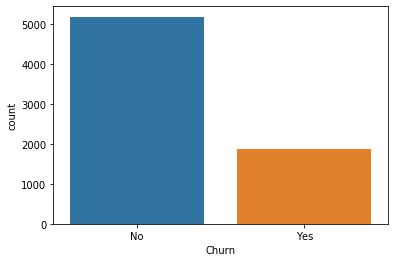

In [7]:
sns.countplot(x= 'Churn', data = dataset)

In [8]:
for i in range(len(dataset['TotalCharges'])):
    if dataset.iloc[i,19] == ' ':
        print(i)

488
753
936
1082
1340
3826
4380


In [9]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', np.nan)

dataset = dataset[dataset['TotalCharges'].notnull()]
dataset = dataset.reset_index()[dataset.columns]

dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

replace_columns = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_columns:
    dataset[i] = dataset[i].replace({'No internet service' : 'No'})
    
dataset['MultipleLines'] = dataset['MultipleLines'].replace({'No phone service' : 'No'})

In [10]:

print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().sum().values.sum())
print ("\nUnique values :  \n",dataset.nunique())


print(dataset['Contract'].unique())
print(dataset['PaymentMethod'].unique())
print(dataset['InternetService'].unique())

Rows     :  7032
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64
['Month-to-month' 'One year' 'Two year']
['Electro

In [11]:
slice1 = dataset.iloc[:,1:8]
slice2 = dataset.iloc[:,9:15]
slice3 = dataset.iloc[:,16:17]
slice4 = dataset.iloc[:,18:]
result = pd.concat([slice1, slice2, slice3, slice4], axis = 1)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encode_columns = [ 'gender', 'Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for i in encode_columns:
    result[i] = le.fit_transform(result[i])

churn = result.iloc[:,-1:]
result = result.iloc[:,:-1]


internet_service = dataset.iloc[:,8:9]
contract = dataset.iloc[:,-6:-5]
payment_method = dataset.iloc[:,-4:-3]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
internet_service = ohe.fit_transform(internet_service).toarray()
contract = ohe.fit_transform(contract).toarray()
payment_method = ohe.fit_transform(payment_method).toarray()

In [13]:
internet_service = pd.DataFrame(data = internet_service, index = range(len(internet_service)), columns = ['DSL','Fiber optic', 'No internet service'])
contract = pd.DataFrame(data = contract, index = range(len(contract)), columns = ['Month-to-month', 'One year', 'Two year'])
payment_method = pd.DataFrame(data = payment_method, index = range(len(payment_method)), columns = ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'])

X = pd.concat([result, internet_service, contract, payment_method], axis = 1)
X = X.values
Y = churn.values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X, Y,test_size=0.2, random_state=0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [15]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout



classifier = Sequential(layers = None, name = None)

classifier.add(Dense(128, init = 'uniform', activation = 'tanh')) 
classifier.add(Dense(256, init = 'uniform', activation = 'tanh'))  
classifier.add(Dense(512, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(1024, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(1, init ='uniform', activation = 'sigmoid'))

Using TensorFlow backend.


In [16]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
            
            
classifier.fit(X_train, y_train, epochs = 50)


y_pred = classifier.predict(X_test, use_multiprocessing=True, max_queue_size=1)
y_pred = (y_pred > 0.5)

Epoch 1/50
5625/5625 [==============================] - 3s 519us/step - loss: 0.4461 - accuracy: 0.7840
Epoch 2/50
5625/5625 [==============================] - 2s 424us/step - loss: 0.4274 - accuracy: 0.7950
Epoch 3/50
5625/5625 [==============================] - 2s 403us/step - loss: 0.4239 - accuracy: 0.8005
Epoch 4/50
5625/5625 [==============================] - 2s 395us/step - loss: 0.4273 - accuracy: 0.7980
Epoch 5/50
5625/5625 [==============================] - 3s 473us/step - loss: 0.4246 - accuracy: 0.7929
Epoch 6/50
5625/5625 [==============================] - 2s 390us/step - loss: 0.4239 - accuracy: 0.8004
Epoch 7/50
5625/5625 [==============================] - 3s 457us/step - loss: 0.4273 - accuracy: 0.7975
Epoch 8/50
5625/5625 [==============================] - 2s 392us/step - loss: 0.4226 - accuracy: 0.8014
Epoch 9/50
5625/5625 [==============================] - 2s 379us/step - loss: 0.4223 - accuracy: 0.7986
Epoch 10/50
5625/5625 [==============================] - 2s 398u

Accuracy:  0.8038379530916845 

Confusion Matrix
 [[932 106]
 [170 199]]


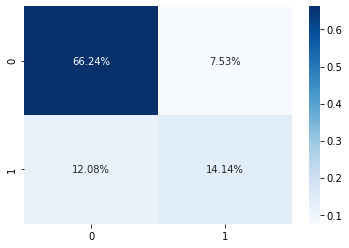

In [17]:
from sklearn.ensemble import AdaBoostClassifier

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')

cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n', cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [18]:
doc = 'model.save'
pickle.dump(classifier, open(doc, 'wb'))